## Data Load

In [93]:
import pandas as pd

In [94]:
## 체감안전도 통계
security_tot = pd.read_csv('./data/4.체감안전도_통계(2017~2019).csv')
security_tot.head()

,large_category,medium_category,tot_f_safety,dept_safety,crime_safety,rob_satety_q1,mur_safety_q2,ta_safety_q3,raw_odder_q4,overall_q5
0,2017 상반기(연령대),10대(만14세 이상),74.3,73.3,81.5,80.1,82.8,70.9,66.9,76.5
1,2017 상반기(연령대),20대,70.1,69.3,76.9,75.7,78.2,66.1,64.3,71.7
2,2017 상반기(연령대),30대,69.6,68.9,76.8,75.7,77.9,63.9,65.2,71.1
3,2017 상반기(연령대),40대,70.7,70.2,77.2,76.1,78.3,65.5,67.0,71.9
4,2017 상반기(연령대),50대,72.1,71.5,78.3,77.7,79.0,68.0,67.6,73.3


In [95]:
## 총인구분포
pop_total = pd.read_csv('./data/14.5개시도_성연령별_총인구분포.csv')
pop_total2 = pop_total.copy() # 외국인 수 추출시 사용
pop_total.head()

,sido,sgg_nm,age,date,popu_num,popu_male_num,popu_female_num,popu_sx_rate,local_num,local_male_num,local_female_num,local_sx_rate
0,서울특별시,종로구,합계,2017,157277,76670,80607,95.1,146298,71757,74541,96.3
1,서울특별시,종로구,0~4세,2017,4137,2099,2038,103.0,4011,2039,1972,103.4
2,서울특별시,종로구,0세,2017,694,336,358,93.9,675,327,348,94.0
3,서울특별시,종로구,1세,2017,836,429,407,105.4,805,412,393,104.8
4,서울특별시,종로구,2세,2017,878,459,419,109.5,850,447,403,110.9


In [96]:
## 기초수급자현황
poor = pd.read_csv('./data/17.5개시도_기초수급자현황.csv')
poor.head()

,date,sido,sgg_nm,age,num
0,201706,서울특별시,종로구,4,4
1,201706,서울특별시,종로구,45,26
2,201706,서울특별시,종로구,46,55
3,201706,서울특별시,종로구,47,37
4,201706,서울특별시,종로구,48,51


In [97]:
## 지구대별 인구현황
jur_center = pd.read_csv('./data/12.경찰서별_지구대별 인원현황.csv')
jur_center.head()

,nat_pol_agency,pol_office,sec_center,num
0,서울경찰청,서울중부경찰서,을지지구대,42
1,서울경찰청,서울중부경찰서,광희지구대,47
2,서울경찰청,서울중부경찰서,약수지구대,42
3,서울경찰청,서울중부경찰서,신당파출소,26
4,서울경찰청,서울중부경찰서,장충파출소,26


# ---------------------------------------------------------------------------------

## ※ 목표
- q1 ~ q5 에 X값으로 들어갈 17 ~ 20년도의 각종 인원 현황을 만든다

### 0. 최종 Merge에 쓰일 Base df를 만든다 (17~20년도 관할서별 상,하반기 컬럼)

In [98]:
# 연도가 포함된 large_cat col과 관할서명이 포함된 medium_cat col만 포함하여 load
security_tot = security_tot[security_tot['large_category'].str.contains('경찰서별')][['large_category','medium_category']]
security_tot.head()

,large_category,medium_category
8,2017 상반기(경찰서별),서울중부
9,2017 상반기(경찰서별),서울종로
10,2017 상반기(경찰서별),서울남대문
11,2017 상반기(경찰서별),서울서대문
12,2017 상반기(경찰서별),서울혜화


In [99]:
security_tot['medium_category'].unique()  # --> 관할서명 통일 필요

array(['서울중부', '서울종로', '서울남대문', '서울서대문', '서울혜화', '서울용산', '서울성북', '서울동대문',
       '서울마포', '서울영등포', '서울성동', '서울동작', '서울광진', '서울서부', '서울강북', '서울금천',
       '서울중랑', '서울강남', '서울관악', '서울강서', '서울강동', '서울종암', '서울구로', '서울서초',
       '서울양천', '서울송파', '서울노원', '서울방배', '서울은평', '서울도봉', '서울수서', '경기남부수원중부',
       '경기남부수원남부', '경기남부수원서부', '충남세종', '경남창원중부', '경남창원서부', '경남마산중부',
       '경남마산동부', '경남진주', '경남진해', '서울중부서', '서울종로서', '서울남대문서', '서울서대문서',
       '서울혜화서', '서울용산서', '서울성북서', '서울동대문서', '서울마포서', '서울영등포서', '서울성동서',
       '서울동작서', '서울광진서', '서울서부서', '서울강북서', '서울금천서', '서울중랑서', '서울강남서',
       '서울관악서', '서울강서서', '서울강동서', '서울종암서', '서울구로서', '서울서초서', '서울양천서',
       '서울송파서', '서울노원서', '서울방배서', '서울은평서', '서울도봉서', '서울수서서', '경기남부수원중부서',
       '경기남부수원남부서', '경기남부수원서부서', '충남세종서', '경남창원중부서', '경남창원서부서', '경남마산중부서',
       '경남마산동부서', '경남진주서', '경남진해서', '세종서'], dtype=object)

In [100]:
# 1. 관할서 컬럼 형식 생성 
# merge 형식을 맞추기 위해 medium_category row값을 인덱싱하여 jur_stn에 삽입
security_tot['jur_stn'] = security_tot['medium_category'].apply(lambda x : x[:-1] if x.endswith('서') and len(x) > 4 else x)
security_tot['jur_stn'] = security_tot['jur_stn'].apply(lambda x : x.replace('세종서','세종'))

security_tot['jur_stn'] = security_tot['jur_stn'].apply(lambda x : x+ '경찰서')
security_tot['jur_stn'] = security_tot['jur_stn'].apply(lambda x : x.replace('경남',''))
security_tot['jur_stn'] = security_tot['jur_stn'].apply(lambda x : x.replace('경기',''))
security_tot['jur_stn'] = security_tot['jur_stn'].apply(lambda x : x.replace('충남',''))
security_tot['jur_stn'] = security_tot['jur_stn'].apply(lambda x : x.replace('남부수원','수원'))
security_tot['jur_stn'].unique() # 최종 결과 확인

array(['서울중부경찰서', '서울종로경찰서', '서울남대문경찰서', '서울서대문경찰서', '서울혜화경찰서', '서울용산경찰서',
       '서울성북경찰서', '서울동대문경찰서', '서울마포경찰서', '서울영등포경찰서', '서울성동경찰서', '서울동작경찰서',
       '서울광진경찰서', '서울서부경찰서', '서울강북경찰서', '서울금천경찰서', '서울중랑경찰서', '서울강남경찰서',
       '서울관악경찰서', '서울강서경찰서', '서울강동경찰서', '서울종암경찰서', '서울구로경찰서', '서울서초경찰서',
       '서울양천경찰서', '서울송파경찰서', '서울노원경찰서', '서울방배경찰서', '서울은평경찰서', '서울도봉경찰서',
       '서울수서경찰서', '수원중부경찰서', '수원남부경찰서', '수원서부경찰서', '세종경찰서', '창원중부경찰서',
       '창원서부경찰서', '마산중부경찰서', '마산동부경찰서', '진주경찰서', '진해경찰서'], dtype=object)

In [101]:
len(security_tot['jur_stn'].unique()) # 최종 결과 확인(41개 관할서)

41

In [102]:
security_tot.head()

,large_category,medium_category,jur_stn
8,2017 상반기(경찰서별),서울중부,서울중부경찰서
9,2017 상반기(경찰서별),서울종로,서울종로경찰서
10,2017 상반기(경찰서별),서울남대문,서울남대문경찰서
11,2017 상반기(경찰서별),서울서대문,서울서대문경찰서
12,2017 상반기(경찰서별),서울혜화,서울혜화경찰서


In [103]:
# 2. Date 컬럼 형식 생성 
# merge 형식을 맞추기 위해 large_category row값을 인덱싱하여 date에 삽입
security_tot['date'] = security_tot['large_category'].apply(lambda x : x.split(' ')[0] + '(' + x.split(' ')[1][:3] + ')' )
security_tot['date'].head()

8     2017(상반기)
9     2017(상반기)
10    2017(상반기)
11    2017(상반기)
12    2017(상반기)
Name: date, dtype: object

In [104]:
security_tot.head()   # 확인

,large_category,medium_category,jur_stn,date
8,2017 상반기(경찰서별),서울중부,서울중부경찰서,2017(상반기)
9,2017 상반기(경찰서별),서울종로,서울종로경찰서,2017(상반기)
10,2017 상반기(경찰서별),서울남대문,서울남대문경찰서,2017(상반기)
11,2017 상반기(경찰서별),서울서대문,서울서대문경찰서,2017(상반기)
12,2017 상반기(경찰서별),서울혜화,서울혜화경찰서,2017(상반기)


In [105]:
security_tot['large_category'].value_counts() # 연도별로 41개 관할서 확인

2017 하반기(경찰서별)    41
2017 상반기(경찰서별)    41
2019 하반기(경찰서별)    41
2019 상반기(경찰서별)    41
2018 상반기(경찰서별)    41
2018 하반기(경찰서별)    41
Name: large_category, dtype: int64

In [106]:
# 20년도 데이터 row도 만들어야 함
temp1 = pd.DataFrame({'jur_stn' :security_tot['jur_stn'].unique(), 'date' : '2020(상반기)'})
temp2 = pd.DataFrame({'jur_stn' :security_tot['jur_stn'].unique(), 'date' : '2020(하반기)'})
# 상, 하반기 별 관할서 row를 만들어 concat
temp_2020 = pd.concat([temp1, temp2])
jur_date_df = pd.concat([security_tot[['jur_stn','date']], temp_2020])
jur_date_df.head()       

,jur_stn,date
8,서울중부경찰서,2017(상반기)
9,서울종로경찰서,2017(상반기)
10,서울남대문경찰서,2017(상반기)
11,서울서대문경찰서,2017(상반기)
12,서울혜화경찰서,2017(상반기)


In [107]:
jur_date_df['date'].value_counts() # 2020년도 상, 하반기 생성 확인

2020(하반기)    41
2019(하반기)    41
2017(상반기)    41
2019(상반기)    41
2017(하반기)    41
2020(상반기)    41
2018(상반기)    41
2018(하반기)    41
Name: date, dtype: int64

In [108]:
## result
jur_date_df.to_csv('jur_date_df.csv')

## 1. 지구대별 인구현황

 - 관할서별 관할 지구대 수와 총 배정 인원

In [109]:
# data check
jur_center.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 320 entries, 0 to 319
Data columns (total 4 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   nat_pol_agency  320 non-null    object
 1   pol_office      320 non-null    object
 2   sec_center      320 non-null    object
 3   num             320 non-null    int64 
dtypes: int64(1), object(3)
memory usage: 10.1+ KB


In [110]:
jur_center['pol_office'].unique()

array(['서울중부경찰서', '서울종로경찰서', '서울남대문경찰서', '서울서대문경찰서', '서울혜화경찰서', '서울용산경찰서',
       '서울성북경찰서', '서울동대문경찰서', '서울마포경찰서', '서울영등포경찰서', '서울성동경찰서', '서울동작경찰서',
       '서울광진경찰서', '서울서부경찰서', '서울강북경찰서', '서울금천경찰서', '서울중랑경찰서', '서울강남경찰서',
       '서울관악경찰서', '서울강서경찰서', '서울강동경찰서', '서울종암경찰서', '서울구로경찰서', '서울일지경찰서',
       '서울척지경찰서', '서울봉지경찰서', '서울류지경찰서', '서울왕파경찰서', '서울로3경찰서', '서울리봉경찰서',
       '서울서초경찰서', '서울양천경찰서', '서울송파경찰서', '서울노원경찰서', '서울방배경찰서', '서울은평경찰서',
       '서울도봉경찰서', '서울수서경찰서', '세종경찰서', '수원중부경찰서', '수원남부경찰서', '수원서부경찰서',
       '창원중부경찰서', '창원서부경찰서', '마산중부경찰서', '마산동부경찰서', '진해경찰서', '진주경찰서'],
      dtype=object)

In [111]:
len(jur_center['pol_office'].unique()) # 관할서 수가 예측에 사용될 41개 경찰서보다 많음을 확인

48

In [112]:
## 예측 대상 41 개 경찰서만 남김
jur_center = jur_center.rename(columns={'pol_office' : 'jur_stn'})
jur_center = jur_center[jur_center['jur_stn'].isin(jur_date_df['jur_stn'].unique())]
len(jur_center['jur_stn'].unique())

41

In [113]:
jur_center.head()

,nat_pol_agency,jur_stn,sec_center,num
0,서울경찰청,서울중부경찰서,을지지구대,42
1,서울경찰청,서울중부경찰서,광희지구대,47
2,서울경찰청,서울중부경찰서,약수지구대,42
3,서울경찰청,서울중부경찰서,신당파출소,26
4,서울경찰청,서울중부경찰서,장충파출소,26


In [114]:
# 관할서 별 지구대 수 추출
sec_center_cnt = jur_center.groupby('jur_stn').count()[['sec_center']]
sec_center_cnt.reset_index(inplace=True)
sec_center_cnt.head()

,jur_stn,sec_center
0,마산동부경찰서,7
1,마산중부경찰서,8
2,서울강남경찰서,8
3,서울강동경찰서,9
4,서울강북경찰서,9


In [115]:
# 지구대 총 배정 인원 수 
center_num_cnt = jur_center.groupby('jur_stn').sum()[['num']]
center_num_cnt.reset_index(inplace=True)
center_num_cnt.head()

,jur_stn,num
0,마산동부경찰서,185
1,마산중부경찰서,142
2,서울강남경찰서,421
3,서울강동경찰서,393
4,서울강북경찰서,347


In [116]:
# 관할서별 관할 지구대 수와 총 배정 인원을 포함한 df 생성
jur_center_con = pd.merge(sec_center_cnt, center_num_cnt , on='jur_stn')
jur_center_con.head()

,jur_stn,sec_center,num
0,마산동부경찰서,7,185
1,마산중부경찰서,8,142
2,서울강남경찰서,8,421
3,서울강동경찰서,9,393
4,서울강북경찰서,9,347


In [117]:
len(jur_center_con)

41

In [118]:
## result
jur_center_con.to_csv('관할서_지구대별_인원_현황.csv')

## 2. 종합인구현황

- 총인구, 연령대별 인구, 성비

In [119]:
pop_total.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13824 entries, 0 to 13823
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   sido              13824 non-null  object 
 1   sgg_nm            13824 non-null  object 
 2   age               13824 non-null  object 
 3   date              13824 non-null  int64  
 4   popu_num          13824 non-null  object 
 5   popu_male_num     13824 non-null  object 
 6   popu_female_num   13824 non-null  object 
 7   popu_sx_rate      13607 non-null  float64
 8   local_num         13824 non-null  object 
 9   local_male_num    13824 non-null  object 
 10  local_female_num  13824 non-null  object 
 11  local_sx_rate     13607 non-null  float64
dtypes: float64(2), int64(1), object(9)
memory usage: 1.3+ MB


In [120]:
for c in pop_total.columns :
    drop_index=pop_total[pop_total[c]=='X'].index   # 숫자값만 row에 필요한데 'X' 문자열 때문에 object 형식으로 되어있어서  #
    pop_total.drop(drop_index,inplace=True)                       #  X를 포함한 row를 제거  #

In [121]:
for c in pop_total.columns[4:] :
    pop_total[c] = pd.to_numeric(pop_total[c])  # 해당 col의 row값을 수치화
pop_total.head(3)

,sido,sgg_nm,age,date,popu_num,popu_male_num,popu_female_num,popu_sx_rate,local_num,local_male_num,local_female_num,local_sx_rate
0,서울특별시,종로구,합계,2017,157277.0,76670.0,80607.0,95.1,146298.0,71757.0,74541.0,96.3
1,서울특별시,종로구,0~4세,2017,4137.0,2099.0,2038.0,103.0,4011.0,2039.0,1972.0,103.4
2,서울특별시,종로구,0세,2017,694.0,336.0,358.0,93.9,675.0,327.0,348.0,94.0


In [122]:
pop_total['popu_num'].describe()

count     13565.000000
mean      11180.208986
std       41319.821129
min          10.000000
25%        1811.000000
50%        3722.000000
75%        6689.000000
max      648600.000000
Name: popu_num, dtype: float64

In [123]:
# 인구 데이터는 기준이 관할서가 아닌 시군구로 되어있음
pop_total['sgg_nm'].unique()

array(['종로구', '용산구', '성동구', '광진구', '동대문구', '중랑구', '성북구', '강북구', '도봉구',
       '노원구', '은평구', '서대문구', '마포구', '양천구', '강서구', '구로구', '금천구', '영등포구',
       '동작구', '관악구', '서초구', '강남구', '송파구', '강동구', '세종시', '수원시장안구',
       '수원시권선구', '수원시팔달구', '수원시영통구', '진주시', '창원시의창구', '창원시성산구',
       '창원시마산합포구', '창원시마산회원구', '창원시진해구', '중구'], dtype=object)

In [124]:
jur_center_con['jur_stn'].unique()

array(['마산동부경찰서', '마산중부경찰서', '서울강남경찰서', '서울강동경찰서', '서울강북경찰서', '서울강서경찰서',
       '서울관악경찰서', '서울광진경찰서', '서울구로경찰서', '서울금천경찰서', '서울남대문경찰서', '서울노원경찰서',
       '서울도봉경찰서', '서울동대문경찰서', '서울동작경찰서', '서울마포경찰서', '서울방배경찰서', '서울서대문경찰서',
       '서울서부경찰서', '서울서초경찰서', '서울성동경찰서', '서울성북경찰서', '서울송파경찰서', '서울수서경찰서',
       '서울양천경찰서', '서울영등포경찰서', '서울용산경찰서', '서울은평경찰서', '서울종로경찰서', '서울종암경찰서',
       '서울중랑경찰서', '서울중부경찰서', '서울혜화경찰서', '세종경찰서', '수원남부경찰서', '수원서부경찰서',
       '수원중부경찰서', '진주경찰서', '진해경찰서', '창원서부경찰서', '창원중부경찰서'], dtype=object)

- 시군구 ---> 경찰서 변환 작업 필요

In [125]:
# 경찰서 명칭 위치 관할 구역 참조
sgg_nm_transfer = {
    '마산동부경찰서' : '창원시마산회원구'  , # 마산회원구 + 합포구 
    '마산중부경찰서' : '창원시마산합포구'  , # 마산합포구 일부
    '서울강남경찰서' : '강남구'  , 
    '서울강동경찰서' : '강동구' , 
    '서울강북경찰서' :'강북구'  , 
    '서울강서경찰서' :  '강서구',
    '서울관악경찰서' : '관악구' ,
      '서울광진경찰서' : '광진구', 
     '서울구로경찰서' : '구로구' , 
     '서울금천경찰서' : '금천구' , 
    '서울남대문경찰서' : '중구' , 
    '서울노원경찰서' : '노원구' ,
    '서울도봉경찰서' : '도봉구'  , 
    '서울동대문경찰서' : '동대문구'  , 
    '서울동작경찰서' : '동작구'  , 
    '서울마포경찰서' : '마포구' , 
    '서울방배경찰서' : '서초구', 
    '서울서대문경찰서' : '서대문구' ,
    '서울서부경찰서' : '은평구' , 
    '서울서초경찰서' : '서초구' , 
    '서울성동경찰서' : '성동구' , 
    '서울성북경찰서' :'성북구' , 
    '서울송파경찰서' :'송파구' , 
    '서울수서경찰서' : '강남구' ,
     '서울양천경찰서': '양천구'  , 
    '서울영등포경찰서' : '영등포구' , 
    '서울용산경찰서': '용산구'  , 
    '서울은평경찰서' : '은평구' , 
    '서울종로경찰서': '종로구', 
    '서울종암경찰서' : '성북구'  ,
     '서울중랑경찰서' : '중랑구'   , 
    '서울중부경찰서' : '중구'  , 
    '서울혜화경찰서': '종로구'  , 
    '세종경찰서' : '세종시'  , 
    '수원남부경찰서': '수원시영통구'  , # 영통구 + 팔달구 일부
   '수원서부경찰서' : '수원시팔달구'  ,   # 팔달구 + 권선구 일부
    '수원중부경찰서' :'수원시장안구'   , # 장안구 + 팔달구 일부
    '진주경찰서' : '진주시'  ,
    '진해경찰서' : '창원시진해구'  , 
    '창원서부경찰서' : '창원시의창구' , 
    '창원중부경찰서': '창원시성산구'   # 의창구 + 성산구
    
}

sgg_nm_transfer_2 = dict(zip(sgg_nm_transfer.values(), sgg_nm_transfer.keys()))

In [126]:
# 인구수가 시군구 기준이므로 base df에 jur_stn column 생성 apply 적용하여 sgg_nm col 생성
jur_date_df['sgg_nm'] = jur_date_df['jur_stn'].apply(lambda x : sgg_nm_transfer[x])
jur_date_df.head() # make base dataframe

,jur_stn,date,sgg_nm
8,서울중부경찰서,2017(상반기),중구
9,서울종로경찰서,2017(상반기),종로구
10,서울남대문경찰서,2017(상반기),중구
11,서울서대문경찰서,2017(상반기),서대문구
12,서울혜화경찰서,2017(상반기),종로구


In [127]:
# 인구데이터 age 분류 확인
pop_total['age'].unique()

array(['합계', '0~4세', '0세', '1세', '2세', '3세', '4세', '5~9세', '5세', '6세',
       '7세', '8세', '9세', '10~14세', '10세', '11세', '12세', '13세', '14세',
       '15~19세', '15세', '16세', '17세', '18세', '19세', '20~24세', '20세',
       '21세', '22세', '23세', '24세', '25~29세', '25세', '26세', '27세', '28세',
       '29세', '30~34세', '30세', '31세', '32세', '33세', '34세', '35~39세',
       '35세', '36세', '37세', '38세', '39세', '40~44세', '40세', '41세', '42세',
       '43세', '44세', '45~49세', '45세', '46세', '47세', '48세', '49세',
       '50~54세', '50세', '51세', '52세', '53세', '54세', '55~59세', '55세',
       '56세', '57세', '58세', '59세', '60~64세', '60세', '61세', '62세', '63세',
       '64세', '65~69세', '65세', '66세', '67세', '68세', '69세', '70~74세',
       '70세', '71세', '72세', '73세', '74세', '75~79세', '75세', '76세', '77세',
       '78세', '79세', '80~84세', '80세', '81세', '82세', '83세', '84세', '85세이상',
       '85~89세', '85세', '86세', '87세', '88세', '89세', '90~94세', '90세',
       '91세', '92세', '93세', '94세', '95~99세', '95세', '96세', '100세이상',
       '15세미

In [128]:
# 일부 row만 사용(총인구,15세미만,15~64,65세,평균연령)
pop_total = pop_total[pop_total['age'].isin(['합계','15세미만', '15~64세', '65세이상', '평균연령'])]
pop_total.head()

,sido,sgg_nm,age,date,popu_num,popu_male_num,popu_female_num,popu_sx_rate,local_num,local_male_num,local_female_num,local_sx_rate
0,서울특별시,종로구,합계,2017,157277.0,76670.0,80607.0,95.1,146298.0,71757.0,74541.0,96.3
123,서울특별시,종로구,15세미만,2017,13733.0,7031.0,6702.0,104.9,13457.0,6890.0,6567.0,104.9
124,서울특별시,종로구,15~64세,2017,119870.0,59371.0,60499.0,98.1,109577.0,54776.0,54801.0,100.0
125,서울특별시,종로구,65세이상,2017,23674.0,10268.0,13406.0,76.6,23264.0,10091.0,13173.0,76.6
126,서울특별시,종로구,평균연령,2017,42.1,41.3,42.9,NaN,42.6,41.6,43.6,NaN


In [129]:
pop_total.columns # 컬럼 확인

Index(['sido', 'sgg_nm', 'age', 'date', 'popu_num', 'popu_male_num',
       'popu_female_num', 'popu_sx_rate', 'local_num', 'local_male_num',
       'local_female_num', 'local_sx_rate'],
      dtype='object')

In [130]:
# 총인구 , 총 남성인구, 총 여성인구, 성비 col만 사용
pop_total = pop_total[['sgg_nm','date','age','popu_num','popu_male_num','popu_female_num','popu_sx_rate']]
pop_total = pop_total.rename(columns={'date' : 'year'})
pop_total.head()

,sgg_nm,year,age,popu_num,popu_male_num,popu_female_num,popu_sx_rate
0,종로구,2017,합계,157277.0,76670.0,80607.0,95.1
123,종로구,2017,15세미만,13733.0,7031.0,6702.0,104.9
124,종로구,2017,15~64세,119870.0,59371.0,60499.0,98.1
125,종로구,2017,65세이상,23674.0,10268.0,13406.0,76.6
126,종로구,2017,평균연령,42.1,41.3,42.9,NaN


In [131]:
# 인구수가 year 기준이므로 base df에 year column 생성
jur_date_df['year'] = jur_date_df['date'].apply(lambda x : int(x[:4]))
jur_date_df.head(3)

,jur_stn,date,sgg_nm,year
8,서울중부경찰서,2017(상반기),중구,2017
9,서울종로경찰서,2017(상반기),종로구,2017
10,서울남대문경찰서,2017(상반기),중구,2017


#### Merge

In [132]:
# base df와 인구 데이터 Merge
pop_total_df = pd.merge(jur_date_df, pop_total , on =['sgg_nm', 'year'])
pop_total_df.head(3)

,jur_stn,date,sgg_nm,year,age,popu_num,popu_male_num,popu_female_num,popu_sx_rate
0,서울중부경찰서,2017(상반기),중구,2017,합계,127896.0,62195.0,65701.0,94.7
1,서울중부경찰서,2017(상반기),중구,2017,15세미만,11035.0,5604.0,5431.0,103.2
2,서울중부경찰서,2017(상반기),중구,2017,15~64세,97649.0,48332.0,49317.0,98.0


In [133]:
pop_total_df['age'].unique()

array(['합계', '15세미만', '15~64세', '65세이상', '평균연령'], dtype=object)

In [134]:
temp_data = pop_total_df[['jur_stn','date','sgg_nm','year']]

In [135]:
# age의 unique 값을 column으로 만들어서 값을 채운다
for i in pop_total_df['age'].unique() :
    temp_data['age_'+i] = 0
temp_data.head(3)

/opt/app-root/lib/python3.6/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


,jur_stn,date,sgg_nm,year,age_합계,age_15세미만,age_15~64세,age_65세이상,age_평균연령
0,서울중부경찰서,2017(상반기),중구,2017,0,0,0,0,0
1,서울중부경찰서,2017(상반기),중구,2017,0,0,0,0,0
2,서울중부경찰서,2017(상반기),중구,2017,0,0,0,0,0


In [136]:
# jur_stn, date에 매칭되는 값을 만든 컬럼에 삽입하는 과정
for i in range(len(pop_total_df)) :
    temp_name = pop_total_df['age'].iloc[i]
    temp = temp_data[(temp_data['jur_stn']==pop_total_df['jur_stn'].iloc[i])&(temp_data['date']==pop_total_df['date'].iloc[i])]
    temp[temp_name] = pop_total_df['popu_num'].iloc[i]
    temp_data['age_'+temp_name].iloc[temp.index] = pop_total_df['popu_num'].iloc[i]
popu_num_df = temp_data
popu_num_df.head(3)

/opt/app-root/lib/python3.6/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """
/opt/app-root/lib/python3.6/site-packages/pandas/core/indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)


,jur_stn,date,sgg_nm,year,age_합계,age_15세미만,age_15~64세,age_65세이상,age_평균연령
0,서울중부경찰서,2017(상반기),중구,2017,127896.0,11035.0,97649.0,19212.0,42.8
1,서울중부경찰서,2017(상반기),중구,2017,127896.0,11035.0,97649.0,19212.0,42.8
2,서울중부경찰서,2017(상반기),중구,2017,127896.0,11035.0,97649.0,19212.0,42.8


In [137]:
## age 별 성비도 위와 동일하게 처리
for i in pop_total_df['age'].unique() :
    temp_data['sx_rate_'+i] = 0
temp_data.head(3)

,jur_stn,date,sgg_nm,year,age_합계,age_15세미만,age_15~64세,age_65세이상,age_평균연령,sx_rate_합계,sx_rate_15세미만,sx_rate_15~64세,sx_rate_65세이상,sx_rate_평균연령
0,서울중부경찰서,2017(상반기),중구,2017,127896.0,11035.0,97649.0,19212.0,42.8,0,0,0,0,0
1,서울중부경찰서,2017(상반기),중구,2017,127896.0,11035.0,97649.0,19212.0,42.8,0,0,0,0,0
2,서울중부경찰서,2017(상반기),중구,2017,127896.0,11035.0,97649.0,19212.0,42.8,0,0,0,0,0


In [138]:
for i in range(len(pop_total_df)) :
    temp_name = pop_total_df['age'].iloc[i]
    temp = temp_data[(temp_data['jur_stn']==pop_total_df['jur_stn'].iloc[i])&(temp_data['date']==pop_total_df['date'].iloc[i])]
    temp[temp_name] = pop_total_df['popu_sx_rate'].iloc[i]
    temp_data['sx_rate_'+temp_name].iloc[temp.index] = pop_total_df['popu_sx_rate'].iloc[i]
popu_num_df = temp_data
popu_num_df.head(3)

/opt/app-root/lib/python3.6/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
/opt/app-root/lib/python3.6/site-packages/pandas/core/indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)


,jur_stn,date,sgg_nm,year,age_합계,age_15세미만,age_15~64세,age_65세이상,age_평균연령,sx_rate_합계,sx_rate_15세미만,sx_rate_15~64세,sx_rate_65세이상,sx_rate_평균연령
0,서울중부경찰서,2017(상반기),중구,2017,127896.0,11035.0,97649.0,19212.0,42.8,94.7,103.2,98.0,75.4,NaN
1,서울중부경찰서,2017(상반기),중구,2017,127896.0,11035.0,97649.0,19212.0,42.8,94.7,103.2,98.0,75.4,NaN
2,서울중부경찰서,2017(상반기),중구,2017,127896.0,11035.0,97649.0,19212.0,42.8,94.7,103.2,98.0,75.4,NaN


In [139]:
del popu_num_df['sx_rate_평균연령'] # 평균연령 성비는 Null 값이므로 제외

In [140]:
popu_num_df.drop_duplicates(inplace=True) # 중복 제외
popu_num_df.head(3) # 최종 확인 

,jur_stn,date,sgg_nm,year,age_합계,age_15세미만,age_15~64세,age_65세이상,age_평균연령,sx_rate_합계,sx_rate_15세미만,sx_rate_15~64세,sx_rate_65세이상
0,서울중부경찰서,2017(상반기),중구,2017,127896.0,11035.0,97649.0,19212.0,42.8,94.7,103.2,98.0,75.4
5,서울남대문경찰서,2017(상반기),중구,2017,127896.0,11035.0,97649.0,19212.0,42.8,94.7,103.2,98.0,75.4
10,서울중부경찰서,2017(하반기),중구,2017,127896.0,11035.0,97649.0,19212.0,42.8,94.7,103.2,98.0,75.4


In [141]:
popu_num_df['date'].value_counts()

2019(하반기)    41
2017(상반기)    41
2019(상반기)    41
2017(하반기)    41
2018(상반기)    41
2018(하반기)    41
Name: date, dtype: int64

## 3. 외국인 현황

- 종합인구 데이터에서 (전체 인구 숫자 - local 인구 숫자) 로 외국인 수 추출 

In [142]:
pop_total = pop_total2[['sido','sgg_nm','age','date','popu_num','local_num']]
pop_total.head(3)

,sido,sgg_nm,age,date,popu_num,local_num
0,서울특별시,종로구,합계,2017,157277,146298
1,서울특별시,종로구,0~4세,2017,4137,4011
2,서울특별시,종로구,0세,2017,694,675


In [143]:
pop_total = pop_total[pop_total['age']=='합계'] # 외국인 데이터는 총합만 사용
# 외국인 수 = (전체 인구 수[popu_num] - local 인구 수[local_num])
pop_total['foreign_num'] = pop_total['popu_num'].astype(int) - pop_total['local_num'].astype(int)  
pop_total.head(3)

,sido,sgg_nm,age,date,popu_num,local_num,foreign_num
0,서울특별시,종로구,합계,2017,157277,146298,10979
128,서울특별시,용산구,합계,2017,223898,207893,16005
256,서울특별시,성동구,합계,2017,302367,291931,10436


In [144]:
foreigner_total = pop_total[['sgg_nm', 'date','foreign_num' ]]
foreigner_total = foreigner_total.rename(columns={'date' : 'year'})
foreigner_total.head(3) # 구 별 외국인 수 추출

,sgg_nm,year,foreign_num
0,종로구,2017,10979
128,용산구,2017,16005
256,성동구,2017,10436


#### Merge

In [145]:
# base df와 외국인 데이터 merge
foreign_df = pd.merge(jur_date_df, foreigner_total, on = ['sgg_nm','year'])
foreign_df= foreign_df[['jur_stn','date','foreign_num']]
foreign_df.head(3)

,jur_stn,date,foreign_num
0,서울중부경찰서,2017(상반기),10265
1,서울남대문경찰서,2017(상반기),10265
2,서울중부경찰서,2017(하반기),10265


In [146]:
foreign_df['date'].value_counts()

2019(하반기)    41
2017(상반기)    41
2019(상반기)    41
2017(하반기)    41
2018(상반기)    41
2018(하반기)    41
Name: date, dtype: int64

In [147]:
## 외국인 + 내국인 merge
total_pop_df = pd.merge(popu_num_df, foreign_df, on= ['jur_stn','date'])
total_pop_df.head()

,jur_stn,date,sgg_nm,year,age_합계,age_15세미만,age_15~64세,age_65세이상,age_평균연령,sx_rate_합계,sx_rate_15세미만,sx_rate_15~64세,sx_rate_65세이상,foreign_num
0,서울중부경찰서,2017(상반기),중구,2017,127896.0,11035.0,97649.0,19212.0,42.8,94.7,103.2,98.0,75.4,10265
1,서울남대문경찰서,2017(상반기),중구,2017,127896.0,11035.0,97649.0,19212.0,42.8,94.7,103.2,98.0,75.4,10265
2,서울중부경찰서,2017(하반기),중구,2017,127896.0,11035.0,97649.0,19212.0,42.8,94.7,103.2,98.0,75.4,10265
3,서울남대문경찰서,2017(하반기),중구,2017,127896.0,11035.0,97649.0,19212.0,42.8,94.7,103.2,98.0,75.4,10265
4,서울종로경찰서,2017(상반기),종로구,2017,157277.0,13733.0,119870.0,23674.0,42.1,95.1,104.9,98.1,76.6,10979


In [148]:
total_pop_df['date'].value_counts()

2019(하반기)    41
2017(상반기)    41
2019(상반기)    41
2017(하반기)    41
2018(상반기)    41
2018(하반기)    41
Name: date, dtype: int64

#### 2020년 누락값 채우기

In [149]:
# 2020년도 데이터가 누락되어 있어서 포함시켜 줌
total_df = pd.merge(jur_date_df[['jur_stn','date']] , total_pop_df, how='left')
total_df.head(3)

,jur_stn,date,sgg_nm,year,age_합계,age_15세미만,age_15~64세,age_65세이상,age_평균연령,sx_rate_합계,sx_rate_15세미만,sx_rate_15~64세,sx_rate_65세이상,foreign_num
0,서울중부경찰서,2017(상반기),중구,2017.0,127896.0,11035.0,97649.0,19212.0,42.8,94.7,103.2,98.0,75.4,10265.0
1,서울종로경찰서,2017(상반기),종로구,2017.0,157277.0,13733.0,119870.0,23674.0,42.1,95.1,104.9,98.1,76.6,10979.0
2,서울남대문경찰서,2017(상반기),중구,2017.0,127896.0,11035.0,97649.0,19212.0,42.8,94.7,103.2,98.0,75.4,10265.0


In [150]:
total_df['date'].value_counts()

2020(하반기)    41
2019(하반기)    41
2017(상반기)    41
2019(상반기)    41
2017(하반기)    41
2020(상반기)    41
2018(상반기)    41
2018(하반기)    41
Name: date, dtype: int64

In [151]:
total_df.isnull().sum()

jur_stn            0
date               0
sgg_nm            82
year              82
age_합계            82
age_15세미만         82
age_15~64세        82
age_65세이상         82
age_평균연령          82
sx_rate_합계        82
sx_rate_15세미만     82
sx_rate_15~64세    82
sx_rate_65세이상     82
foreign_num       82
dtype: int64

In [152]:
total_df[total_df['year'].isnull()].head(3) # 2020년 데이터가 비어있음을 확인

,jur_stn,date,sgg_nm,year,age_합계,age_15세미만,age_15~64세,age_65세이상,age_평균연령,sx_rate_합계,sx_rate_15세미만,sx_rate_15~64세,sx_rate_65세이상,foreign_num
246,서울중부경찰서,2020(상반기),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
247,서울종로경찰서,2020(상반기),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
248,서울남대문경찰서,2020(상반기),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [153]:
total_df['year'].fillna(2020,inplace=True)

In [154]:
total_df.columns[4:] # 채워야 할 컬럼들

Index(['age_합계', 'age_15세미만', 'age_15~64세', 'age_65세이상', 'age_평균연령',
       'sx_rate_합계', 'sx_rate_15세미만', 'sx_rate_15~64세', 'sx_rate_65세이상',
       'foreign_num'],
      dtype='object')

In [155]:
# 2020년도의 null 값은 각 관할서별 17~19년도 평균값으로 채움
for c in total_df.columns[4:] :
    for j in total_df['jur_stn'].unique() :
        null_index = total_df[(total_df['year']==2020) & (total_df['jur_stn']==j)].index
        notnull_mean = total_df[total_df['jur_stn']==j].mean()
        for i in null_index :
            total_df.loc[i, c] = notnull_mean[c]
total_df[total_df['date'].str.contains('2020')].head(3) # result check

,jur_stn,date,sgg_nm,year,age_합계,age_15세미만,age_15~64세,age_65세이상,age_평균연령,sx_rate_합계,sx_rate_15세미만,sx_rate_15~64세,sx_rate_65세이상,foreign_num
246,서울중부경찰서,2020(상반기),NaN,2020.0,129550.000000,10835.333333,98794.333333,19920.333333,43.066667,94.266667,102.933333,97.600000,75.466667,11604.000000
247,서울종로경찰서,2020(상반기),NaN,2020.0,156737.666667,13203.666667,119421.000000,24113.000000,42.400000,94.700000,103.933333,97.633333,77.200000,12064.666667
248,서울남대문경찰서,2020(상반기),NaN,2020.0,129550.000000,10835.333333,98794.333333,19920.333333,43.066667,94.266667,102.933333,97.600000,75.466667,11604.000000


In [156]:
# 2020년도 sgg_nm 값 채우기
for j in total_df['jur_stn'].unique() :
        null_index = total_df[(total_df['year']==2020) & (total_df['jur_stn']==j)].index
        notnull_val = total_df[(total_df['jur_stn'] == j) & (total_df['sgg_nm'].notnull()) ]['sgg_nm'].iloc[0]
        for i in null_index :
            total_df.loc[i, 'sgg_nm'] = notnull_val
total_df[total_df['date'].str.contains('2020')].head(3) # result check

,jur_stn,date,sgg_nm,year,age_합계,age_15세미만,age_15~64세,age_65세이상,age_평균연령,sx_rate_합계,sx_rate_15세미만,sx_rate_15~64세,sx_rate_65세이상,foreign_num
246,서울중부경찰서,2020(상반기),중구,2020.0,129550.000000,10835.333333,98794.333333,19920.333333,43.066667,94.266667,102.933333,97.600000,75.466667,11604.000000
247,서울종로경찰서,2020(상반기),종로구,2020.0,156737.666667,13203.666667,119421.000000,24113.000000,42.400000,94.700000,103.933333,97.633333,77.200000,12064.666667
248,서울남대문경찰서,2020(상반기),중구,2020.0,129550.000000,10835.333333,98794.333333,19920.333333,43.066667,94.266667,102.933333,97.600000,75.466667,11604.000000


In [157]:
total_df.isnull().sum().sum()

0

In [158]:
total_df.to_csv('total_df.csv')

In [159]:
import pandas as pd
total_df = pd.read_csv('total_df.csv')

In [160]:
total_df.columns

Index(['Unnamed: 0', 'jur_stn', 'date', 'sgg_nm', 'year', 'age_합계',
       'age_15세미만', 'age_15~64세', 'age_65세이상', 'age_평균연령', 'sx_rate_합계',
       'sx_rate_15세미만', 'sx_rate_15~64세', 'sx_rate_65세이상', 'foreign_num'],
      dtype='object')

## 4. 기초수급자 현황

In [161]:
# 연도 데이터 상, 하반기로 나누기
poor['new_date'] = poor['date'].apply(lambda x : str(x)[:4] + '(상반기)' if int(str(x)[-2:]) < 7 else str(x)[:4] + '(하반기)')
poor.head()

,date,sido,sgg_nm,age,num,new_date
0,201706,서울특별시,종로구,4,4,2017(상반기)
1,201706,서울특별시,종로구,45,26,2017(상반기)
2,201706,서울특별시,종로구,46,55,2017(상반기)
3,201706,서울특별시,종로구,47,37,2017(상반기)
4,201706,서울특별시,종로구,48,51,2017(상반기)


In [162]:
# 기초수급자 전체 인원수 count
poor_count = poor.groupby(['sgg_nm','new_date']).sum()[['num']]
poor_count.reset_index(inplace=True)
poor_count = poor_count.rename(columns={'new_date' : 'date', 'num':'poor_num'})
poor_count.head()

,sgg_nm,date,poor_num
0,강남구,2017(상반기),21444
1,강남구,2017(하반기),64245
2,강남구,2018(상반기),63198
3,강남구,2018(하반기),62806
4,강남구,2019(상반기),68048


In [163]:
poor_count['sgg_nm'].unique()

array(['강남구', '강동구', '강북구', '강서구', '관악구', '광진구', '구로구', '금천구', '노원구',
       '도봉구', '동대문구', '동작구', '마포구', '서대문구', '서초구', '성동구', '성북구',
       '세종특별자치시', '송파구', '수원시', '양천구', '영등포구', '용산구', '은평구', '종로구', '중구',
       '중랑구', '진주시', '창원시'], dtype=object)

In [164]:
jur_date_df['sgg_nm'].unique() 
# --> 기초수급자 시군구 분류와 base df의 분류가 다름(수원시, 창원시 상세분류가 덜 되어있음)

array(['중구', '종로구', '서대문구', '용산구', '성북구', '동대문구', '마포구', '영등포구', '성동구',
       '동작구', '광진구', '은평구', '강북구', '금천구', '중랑구', '강남구', '관악구', '강서구',
       '강동구', '구로구', '서초구', '양천구', '송파구', '노원구', '도봉구', '수원시장안구',
       '수원시영통구', '수원시팔달구', '세종시', '창원시성산구', '창원시의창구', '창원시마산합포구',
       '창원시마산회원구', '진주시', '창원시진해구'], dtype=object)

In [165]:
poor_count['sgg_nm'] = poor_count['sgg_nm'].apply(lambda x : '세종시' if x == '세종특별자치시' else x)

#### merge

In [166]:
poor_df = pd.merge(jur_date_df, poor_count, on=['sgg_nm','date'], how='left')
poor_df.head()

,jur_stn,date,sgg_nm,year,poor_num
0,서울중부경찰서,2017(상반기),중구,2017,7618.0
1,서울종로경찰서,2017(상반기),종로구,2017,7272.0
2,서울남대문경찰서,2017(상반기),중구,2017,7618.0
3,서울서대문경찰서,2017(상반기),서대문구,2017,14210.0
4,서울혜화경찰서,2017(상반기),종로구,2017,7272.0


In [167]:
poor_df['date'].value_counts()

2020(하반기)    41
2019(하반기)    41
2017(상반기)    41
2019(상반기)    41
2017(하반기)    41
2020(상반기)    41
2018(상반기)    41
2018(하반기)    41
Name: date, dtype: int64

In [168]:
poor_df[poor_df['poor_num'].isnull()]['jur_stn'].unique() # 시군구 분류 문제로 값이 못 들어간 관할서 리스트

array(['수원중부경찰서', '수원남부경찰서', '수원서부경찰서', '창원중부경찰서', '창원서부경찰서', '마산중부경찰서',
       '마산동부경찰서', '진해경찰서'], dtype=object)

In [169]:
poor_df['poor_num'].describe()

count       264.000000
mean      60124.553030
std       34577.407418
min        7272.000000
25%       30404.000000
50%       56595.500000
75%       77987.000000
max      179250.000000
Name: poor_num, dtype: float64

<AxesSubplot:>

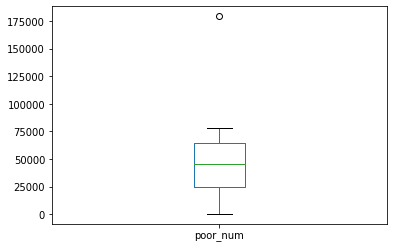

In [170]:
poor_df['poor_num'].describe().plot(kind='box') # 분포 및 이상치 확인

In [171]:
poor_df.sort_values(by='poor_num', ascending=False).head(5) # 기초수급자가 가장 많은 상위 5

,jur_stn,date,sgg_nm,year,poor_num
313,서울노원경찰서,2020(하반기),노원구,2020,179250.0
272,서울노원경찰서,2020(상반기),노원구,2020,168070.0
231,서울노원경찰서,2019(하반기),노원구,2019,161163.0
306,서울강서경찰서,2020(하반기),강서구,2020,160206.0
190,서울노원경찰서,2019(상반기),노원구,2019,155781.0


In [172]:
poor_df[poor_df['poor_num'].notnull()].sort_values(by='poor_num').head(5)  # 기초수급자가 가장 적은 상위 5

,jur_stn,date,sgg_nm,year,poor_num
1,서울종로경찰서,2017(상반기),종로구,2017,7272.0
4,서울혜화경찰서,2017(상반기),종로구,2017,7272.0
34,세종경찰서,2017(상반기),세종시,2017,7570.0
0,서울중부경찰서,2017(상반기),중구,2017,7618.0
2,서울남대문경찰서,2017(상반기),중구,2017,7618.0


In [173]:
# 비수도권 현황 확인
not_seoul = poor_df.drop(poor_df[poor_df['jur_stn'].str.contains('서울')].index)
not_seoul[not_seoul['poor_num'].notnull()].sort_values('poor_num')
# 17 ~ 20으로 갈수록 기초수급자 수 크게 증가

,jur_stn,date,sgg_nm,year,poor_num
34,세종경찰서,2017(상반기),세종시,2017,7570.0
75,세종경찰서,2017(하반기),세종시,2017,22909.0
116,세종경찰서,2018(상반기),세종시,2018,23006.0
39,진주경찰서,2017(상반기),진주시,2017,23158.0
157,세종경찰서,2018(하반기),세종시,2018,24595.0
198,세종경찰서,2019(상반기),세종시,2019,28175.0
236,세종경찰서,2019(하반기),세종시,2019,30458.0
280,세종경찰서,2020(상반기),세종시,2020,33813.0
321,세종경찰서,2020(하반기),세종시,2020,38665.0
121,진주경찰서,2018(상반기),진주시,2018,68130.0


In [191]:
# 17 ~ 20으로 갈수록 기초수급자 수 증가
print('2017년 기초수급자 평균 :'  ,not_seoul[not_seoul['year']==2017]['poor_num'].mean())
print('2018년 기초수급자 평균 :'  ,not_seoul[not_seoul['year']==2018]['poor_num'].mean())
print('2019년 기초수급자 평균 :'  ,not_seoul[not_seoul['year']==2019]['poor_num'].mean())
print('2020년 기초수급자 평균 :'  ,not_seoul[not_seoul['year']==2020]['poor_num'].mean())

2017년 기초수급자 평균 : 30687.75
2018년 기초수급자 평균 : 46522.25
2019년 기초수급자 평균 : 52724.75
2020년 기초수급자 평균 : 58940.0


In [174]:
# 서울권 현황 확인
seoul = poor_df[poor_df['jur_stn'].str.contains('서울')]
print('2017년 기초수급자 평균 :'  ,seoul[seoul['year']==2017]['poor_num'].mean())
print('2018년 기초수급자 평균 :'  ,seoul[seoul['year']==2018]['poor_num'].mean())
print('2019년 기초수급자 평균 :'  ,seoul[seoul['year']==2019]['poor_num'].mean())
print('2020년 기초수급자 평균 :'  ,seoul[seoul['year']==2020]['poor_num'].mean())
# 17 ~ 20으로 갈수록 기초수급자 수 크게 증가

2017년 기초수급자 평균 : 39070.6129032258
2018년 기초수급자 평균 : 59468.72580645161
2019년 기초수급자 평균 : 68168.75806451614
2020년 기초수급자 평균 : 77120.66129032258


In [175]:
poor_df['poor_num'].isnull().sum() # 총 null 개수

64

In [176]:
# 기초수급자 / 총인구 비율 확인
merge_df = pd.merge(total_df[['jur_stn','date','age_합계']], poor_df, on=['jur_stn','date'] , how='left')
merge_df.head(3)

,jur_stn,date,age_합계,sgg_nm,year,poor_num
0,서울중부경찰서,2017(상반기),127896.0,중구,2017,7618.0
1,서울종로경찰서,2017(상반기),157277.0,종로구,2017,7272.0
2,서울남대문경찰서,2017(상반기),127896.0,중구,2017,7618.0


In [177]:
merge_df['poor_ratio'] = merge_df['poor_num'] / merge_df['age_합계']* 100
merge_df.head()

,jur_stn,date,age_합계,sgg_nm,year,poor_num,poor_ratio
0,서울중부경찰서,2017(상반기),127896.0,중구,2017,7618.0,5.956402
1,서울종로경찰서,2017(상반기),157277.0,종로구,2017,7272.0,4.623689
2,서울남대문경찰서,2017(상반기),127896.0,중구,2017,7618.0,5.956402
3,서울서대문경찰서,2017(상반기),321345.0,서대문구,2017,14210.0,4.422039
4,서울혜화경찰서,2017(상반기),157277.0,종로구,2017,7272.0,4.623689


In [178]:
merge_df['poor_ratio'].describe()

count    264.000000
mean      16.011643
std        7.051703
min        2.255458
25%       11.696412
50%       15.824481
75%       20.244890
max       37.100723
Name: poor_ratio, dtype: float64

In [179]:
# 서울권 현황 확인
seoul = merge_df[merge_df['jur_stn'].str.contains('서울')]
print('2017년 기초수급자 비율 평균 :'  ,seoul[seoul['year']==2017]['poor_ratio'].mean())
print('2018년 기초수급자 비율 평균 :'  ,seoul[seoul['year']==2018]['poor_ratio'].mean())
print('2019년 기초수급자 비율 평균 :'  ,seoul[seoul['year']==2019]['poor_ratio'].mean())
print('2020년 기초수급자 비율 평균 :'  ,seoul[seoul['year']==2020]['poor_ratio'].mean())

2017년 기초수급자 비율 평균 : 10.325174853863588
2018년 기초수급자 비율 평균 : 15.813238564071392
2019년 기초수급자 비율 평균 : 18.118304314141483
2020년 기초수급자 비율 평균 : 20.346108147064033


In [180]:
# 비수도권 현황 확인
not_seoul = merge_df.drop(merge_df[merge_df['jur_stn'].str.contains('서울')].index)
not_seoul[not_seoul['poor_num'].notnull()].sort_values('poor_ratio')

,jur_stn,date,age_합계,sgg_nm,year,poor_num,poor_ratio
34,세종경찰서,2017(상반기),276589.0,세종시,2017,7570.0,2.736913
39,진주경찰서,2017(상반기),353209.0,진주시,2017,23158.0,6.556458
116,세종경찰서,2018(상반기),312374.0,세종시,2018,23006.0,7.364890
157,세종경찰서,2018(하반기),312374.0,세종시,2018,24595.0,7.873575
75,세종경찰서,2017(하반기),276589.0,세종시,2017,22909.0,8.282687
198,세종경찰서,2019(상반기),338136.0,세종시,2019,28175.0,8.332446
236,세종경찰서,2019(하반기),338136.0,세종시,2019,30458.0,9.007618
280,세종경찰서,2020(상반기),309033.0,세종시,2020,33813.0,10.941550
321,세종경찰서,2020(하반기),309033.0,세종시,2020,38665.0,12.511609
121,진주경찰서,2018(상반기),352333.0,진주시,2018,68130.0,19.336821


In [181]:
# 17 ~ 20으로 갈수록 기초수급자 비율 증가
print('2017년 기초수급자 비율 평균 :'  ,not_seoul[not_seoul['year']==2017]['poor_ratio'].mean())
print('2018년 기초수급자 비율 평균 :'  ,not_seoul[not_seoul['year']==2018]['poor_ratio'].mean())
print('2019년 기초수급자 비율 평균 :'  ,not_seoul[not_seoul['year']==2019]['poor_ratio'].mean())
print('2020년 기초수급자 비율 평균 :'  ,not_seoul[not_seoul['year']==2020]['poor_ratio'].mean())

2017년 기초수급자 비율 평균 : 9.28587727945683
2018년 기초수급자 비율 평균 : 13.63611540000489
2019년 기초수급자 비율 평균 : 15.083224555417136
2020년 기초수급자 비율 평균 : 17.4194447728173


#### null 값 채우기(일부관할서)
- 17년 : 인구비의 10%
- 18년 : 인구비의 14%    
- 19년 : 인구비의 15%    
- 20년 : 인구비의 18%    

In [192]:
# fill Na
merge_df['poor_num'].fillna(0, inplace=True)
# 2017
merge_df['poor_num'] = merge_df.apply(lambda x: x['age_합계'] * 0.10 if x['year']==2017 and x['poor_num'] == 0 else x['poor_num'] ,axis=1)
# 2018
merge_df['poor_num'] = merge_df.apply(lambda x: x['age_합계'] * 0.14 if x['year']==2018 and x['poor_num'] == 0 else x['poor_num'] ,axis=1)
# 2019
merge_df['poor_num'] = merge_df.apply(lambda x: x['age_합계'] * 0.15 if x['year']==2019 and x['poor_num'] == 0 else x['poor_num'] ,axis=1)
# 2020
merge_df['poor_num'] = merge_df.apply(lambda x: x['age_합계'] * 0.18 if x['year']==2020 and x['poor_num'] == 0 else x['poor_num'] ,axis=1)

merge_df.head() # result

,jur_stn,date,age_합계,sgg_nm,year,poor_num,poor_ratio
0,서울중부경찰서,2017(상반기),127896.0,중구,2017,7618.0,5.956402
1,서울종로경찰서,2017(상반기),157277.0,종로구,2017,7272.0,4.623689
2,서울남대문경찰서,2017(상반기),127896.0,중구,2017,7618.0,5.956402
3,서울서대문경찰서,2017(상반기),321345.0,서대문구,2017,14210.0,4.422039
4,서울혜화경찰서,2017(상반기),157277.0,종로구,2017,7272.0,4.623689


In [183]:
# 채워준 값까지 ratio 적용
merge_df['poor_ratio'] = merge_df['poor_num'] / merge_df['age_합계']* 100

In [184]:
poor_df = merge_df[['jur_stn','date','poor_num','poor_ratio']] # 필요한 컬럼만 추출
poor_df.head()

,jur_stn,date,poor_num,poor_ratio
0,서울중부경찰서,2017(상반기),7618.0,5.956402
1,서울종로경찰서,2017(상반기),7272.0,4.623689
2,서울남대문경찰서,2017(상반기),7618.0,5.956402
3,서울서대문경찰서,2017(상반기),14210.0,4.422039
4,서울혜화경찰서,2017(상반기),7272.0,4.623689


In [185]:
poor_df.to_csv('poor_df.csv')

## 5. 최종

In [186]:
#jur_center_con 관할서
#poor_df 기초수급자 
# total_pop_df + 외국인 + 상주인구현황

In [187]:
# 위에서 실행하여 얻은 최종 df merge
final_df = pd.merge(poor_df, total_df, on=['jur_stn','date'])
final_df.head()

,jur_stn,date,poor_num,poor_ratio,Unnamed: 0,sgg_nm,year,age_합계,age_15세미만,age_15~64세,age_65세이상,age_평균연령,sx_rate_합계,sx_rate_15세미만,sx_rate_15~64세,sx_rate_65세이상,foreign_num
0,서울중부경찰서,2017(상반기),7618.0,5.956402,0,중구,2017.0,127896.0,11035.0,97649.0,19212.0,42.8,94.7,103.2,98.0,75.4,10265.0
1,서울종로경찰서,2017(상반기),7272.0,4.623689,1,종로구,2017.0,157277.0,13733.0,119870.0,23674.0,42.1,95.1,104.9,98.1,76.6,10979.0
2,서울남대문경찰서,2017(상반기),7618.0,5.956402,2,중구,2017.0,127896.0,11035.0,97649.0,19212.0,42.8,94.7,103.2,98.0,75.4,10265.0
3,서울서대문경찰서,2017(상반기),14210.0,4.422039,3,서대문구,2017.0,321345.0,32337.0,242443.0,46565.0,41.3,88.8,102.8,90.2,73.6,13152.0
4,서울혜화경찰서,2017(상반기),7272.0,4.623689,4,종로구,2017.0,157277.0,13733.0,119870.0,23674.0,42.1,95.1,104.9,98.1,76.6,10979.0


In [188]:
final_df['date'].value_counts()

2020(하반기)    41
2019(하반기)    41
2017(상반기)    41
2019(상반기)    41
2017(하반기)    41
2020(상반기)    41
2018(상반기)    41
2018(하반기)    41
Name: date, dtype: int64

In [189]:
final_df.to_csv('인구정보종합.csv')